In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("weather_forecast_data.csv")
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [3]:
#TO FIND NULL VALUES 

In [4]:
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [5]:
df.isna().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [6]:
df["Rain"].value_counts()

Rain
no rain    2186
rain        314
Name: count, dtype: int64

In [7]:
#ONLY COLUMNS

In [8]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

In [9]:
a=['H','A','R','S','H','I']
type(a)

list

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
#STASTICAL SUMMARY 

In [12]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [13]:
#SUMMARY OF THE DATASET

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [15]:
#CHECK OUTLIERS

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

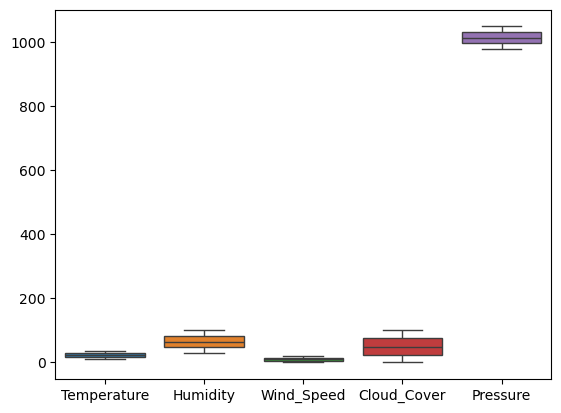

In [17]:
sns.boxplot(df)
plt.show()

In [18]:
#TO FIND DUPLICATES

In [19]:
df.duplicated().sum()

0

In [20]:
df.duplicated().value_counts()

False    2500
Name: count, dtype: int64

In [21]:
#ONE PARTICULAR COLUMN CHECK OUTLIERS 

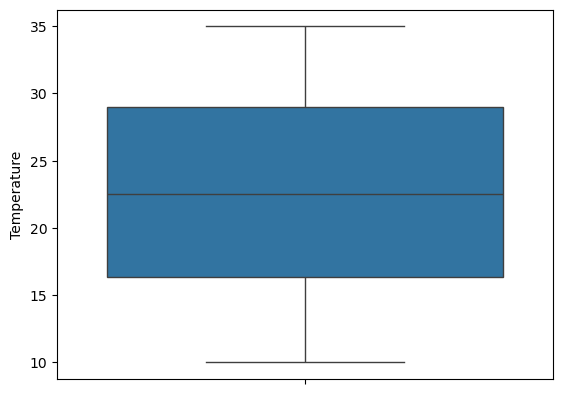

In [22]:
sns.boxplot(data=df["Temperature"])
plt.show()

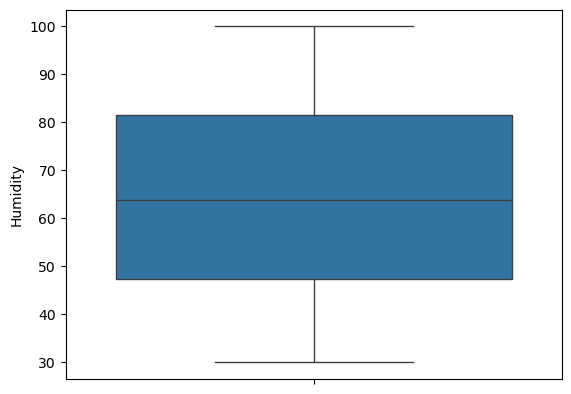

In [23]:
sns.boxplot(data=df["Humidity"])
plt.show()

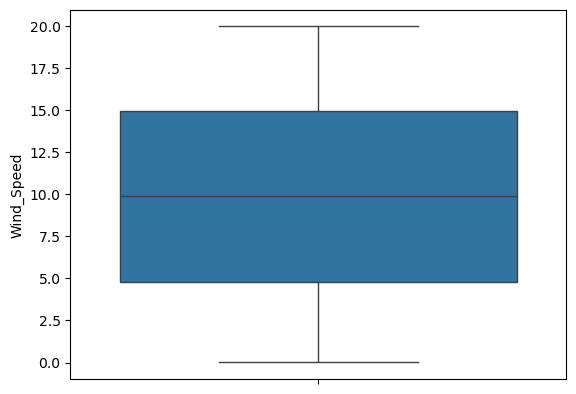

In [24]:
sns.boxplot(data=df["Wind_Speed"])
plt.show()

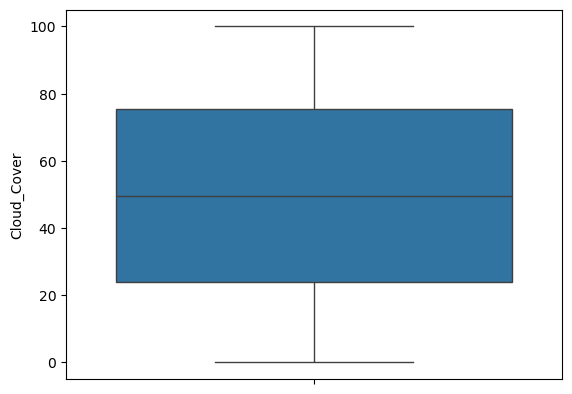

In [25]:
sns.boxplot(data=df["Cloud_Cover"])
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
x=df[["Temperature","Humidity","Wind_Speed","Cloud_Cover","Pressure"]]
y=df["Rain"]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
scaler=StandardScaler()
scaler

StandardScaler()

In [30]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred=model.predict(x_test)
y_pred

array(['no rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain',
       'no rain', 'no rain', 'rain', 'no rain', 'rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'no rain', 'rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'no rain', 'rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain',
       'no rain', 'no rain', 'rain', 'rain', 'no rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain',
       'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain',
       'no rain', 'rain', 'no rain', 'rain', 'no rain', 'no rain',
       '

In [33]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.932

In [34]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[430,  13],
       [ 21,  36]], dtype=int64)

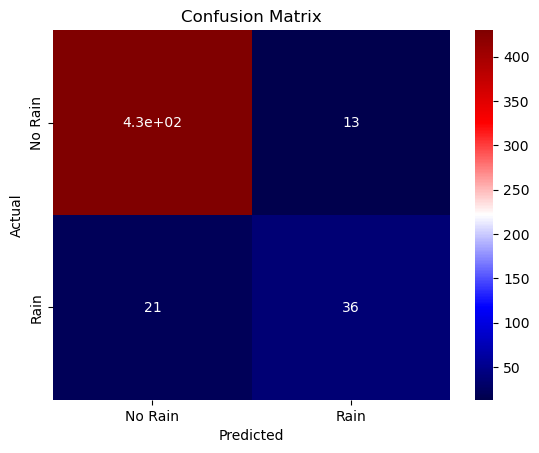

In [78]:
sns.heatmap(conf_matrix,annot=True,cmap="seismic",xticklabels=["No Rain","Rain"],yticklabels=["No Rain","Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()